# Diffusion

In this notebook we will discuss briefly the basics of diffusion and its implementation in python. The main aim is to use the equation diffusion as a case study for numerical integration. 

## Theory

Diffusion is defined as a mechanism that spread molecules from a region of high concentration to a region of lower concentration in space. 

![8uKDvS.gif](https://i.makeagif.com/media/2-15-2016/8uKDvS.gif)
        The movement of dye spreading in water is an example of diffusion.


The diffusion equation is given by 

$$ \partial_t c(x,y,z,t) =  D \nabla^2 c(x,y,z,t) $$

where $c(x,y,z,t)$ is a function defined in the space $\mathcal{R}^3$, $D$ is the diffusion coefficient or diffusivity that is related to how fast the field $c$ diffuses in space, $\nabla^2$ is the laplacian operator and $\partial_t$ the partial time derivative.

## Numerical Methods

### Euler Method 

The Euler's method is based on the definition of derivatives, such as: 
$$ \frac{\mathrm{d} f(t) }{\mathrm{d}t} \approx \frac{f(t + \delta t) - f(t)}{ \delta t} \textrm{.}$$

Thus if we want to integrate the function $g(t)$, which is the derivative of the primitive function $f(t)$, we write
$$  \frac{f(t + \delta t) - f(t)}{ \delta t} = g(t) \textrm{,}$$ 
and isolate $f(t+\delta t)$
$$ f(t + \delta t) = f(t) + \delta t g(t) \textrm{.}$$

The integration is an iterative process where we use the previous value of the function $f(t)$ in order to calculate the next value $f(t+\delta t)$. It is common to find in the literature the Euler method written as 
$$ f_{n+1} = f_{n} + h g_{n} \textrm{,}$$
where $n$ is the $n$th-iteration. 


In [1]:
from ipywidgets import interactive, fixed
from euler import euler
w = interactive(euler,h=(0.01,0.5))
w

interactive(children=(FloatSlider(value=0.255, description='h', max=0.5, min=0.01), Output()), _dom_classes=('…

In the first graphic we can see the result of the integration compared to the exact solution. The Euler method is not perfect, but return quite similar quantitative results to the exact solution and conserves the qualitative behaviour. 

Change the value of $h$ using the slider and look the difference in the result. What do you observe?


### Discrete Laplace operator $\nabla^2$

We will use Finite Difference method with central differences in order to compute the laplacean. We will not show the derivation of the method here, but you can find further discussions in [DLO_1]. 

The definition of the discrete 2nd order Laplace operator using only first neighbours is

$$ \nabla^2 f(x_1,\cdots,x_n) \approx \sum_{i=1}^N \frac{\left(f(x_i+h_i) + f(x_i-h_i) - 2f(x_i) \right)}{h_i^{2}} \textrm{.} $$


In [2]:
def laplacian(f, i, l):
    h = 1.
    y = i
    yh = check_boundary(i+1, l)
    yl = check_boundary(i-1, l)
    return (f[yh]+f[yl]-2*f[y])/(h*h)

The precision can be improved adding more points to compute the laplacean. The following table shows the coefficients for several derivative orders and different precisions. Obtained from [DLO_2]. 

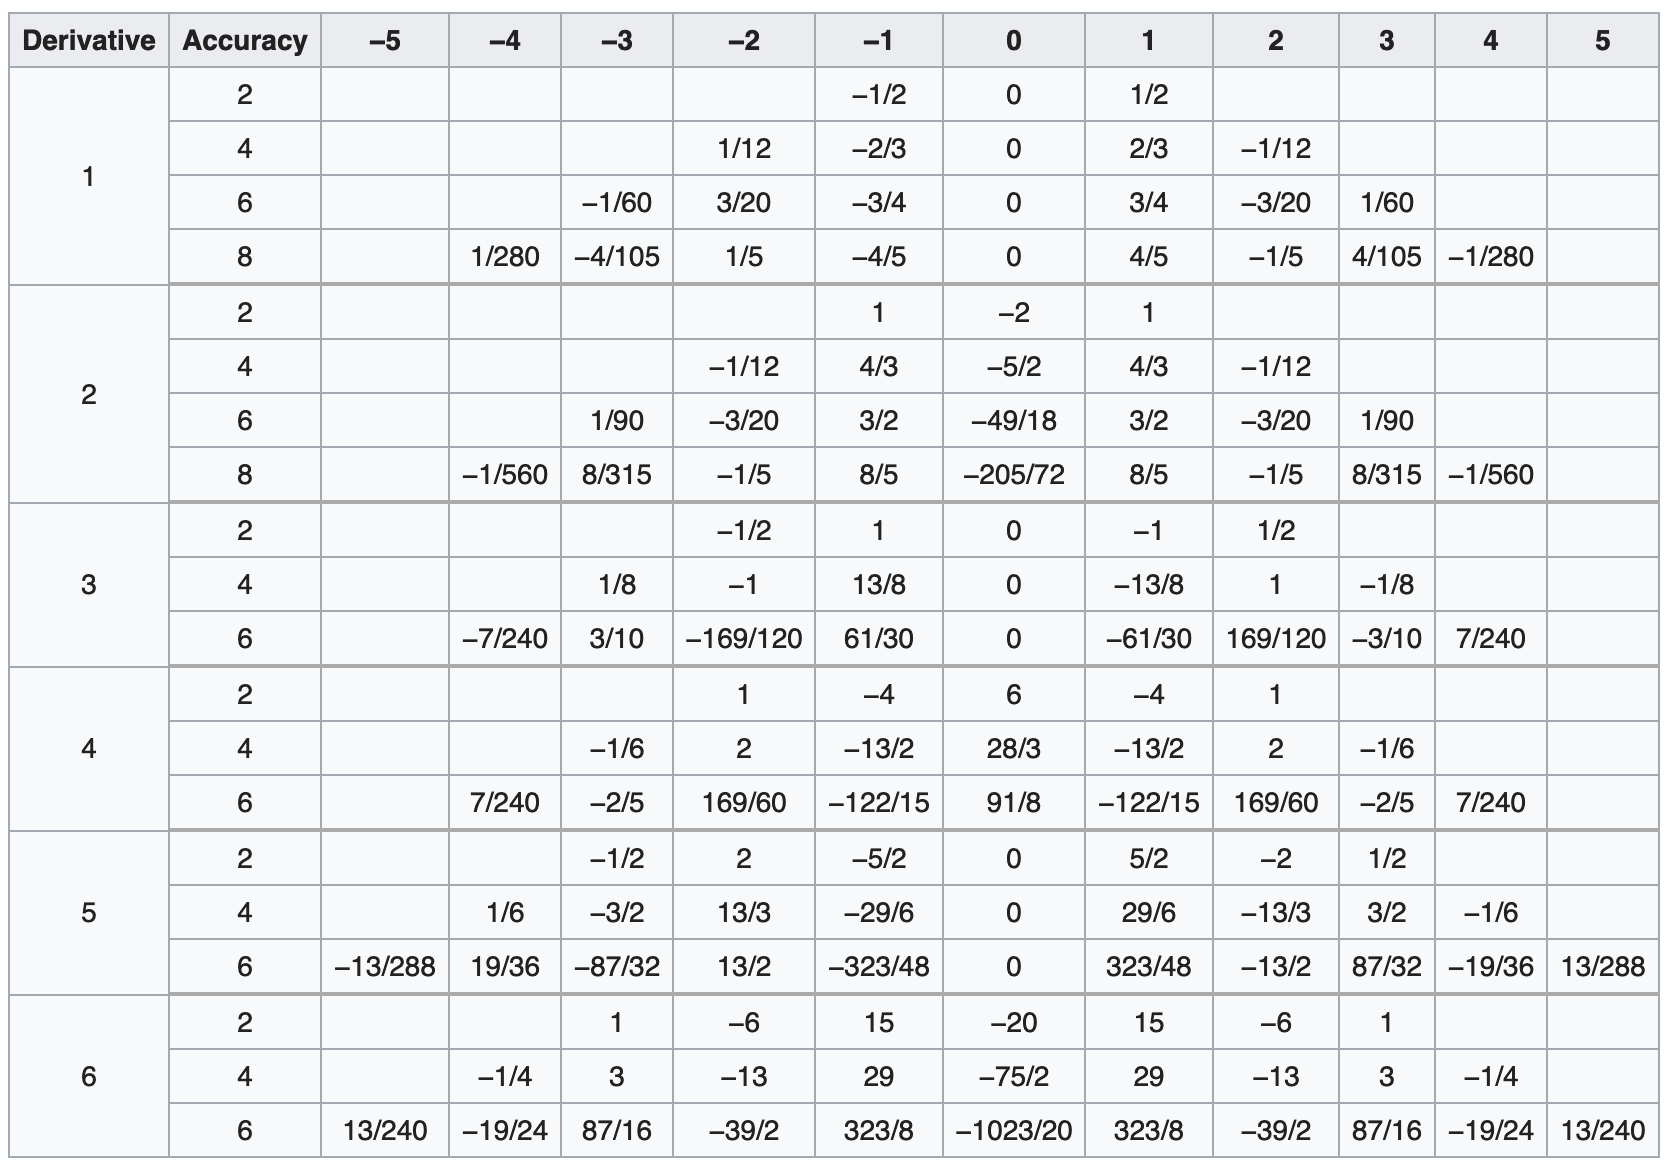

[DLO_1] __[Finite Difference - Wikipedia](https://en.wikipedia.org/wiki/Finite_difference)__

[DLO_2] __[Central Difference - Wikipedia](https://en.wikipedia.org/wiki/Finite_difference_coefficient)__

## Implementation

Now we have all the main ingredients to integrate the diffusion equation, re-rewritting it using Finite Differences and the Euler method
$$ \frac{f(x,t+\delta t)-f(x,t) }{\delta t} = D \left[ f(x+h,t) + f(x-h,t) - 2f(x,t) \right]  $$ 

$$ f(x,t+\delta t) = f(x,t) + \delta t D \left[ f(x+h,t) + f(x-h,t) - 2f(x,t) \right]  $$ 



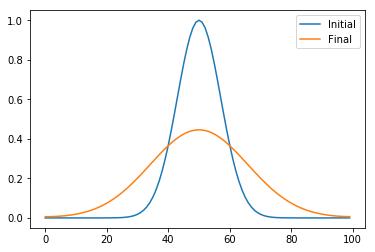

In [7]:
import diffusion as df
import matplotlib.pyplot as plt
l = 100 # spatial length
dt = 0.01 # time increment
final_time = 100
A = df.init(l) # initializing array with a Gaussian distribution

plt.plot(A,label='Initial') # plot initial condition

A = df.integrate(A, dt, final_time)

plt.plot(A, label='Final') # 
plt.legend()
plt.show()

Change the *final_time* and see what happens (test using a long period, e.g. 1000). What conclusions can you draw from the results above? Does it behave as expected for a diffusion system?